<a href="https://colab.research.google.com/github/JaperTai77/webscraping/blob/main/webscraping_wiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [143]:
url = 'https://en.wikipedia.org/wiki/Epidemiology_of_depression'
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')

In [33]:
soup.find_all('tr')[1].find_all('td')[0].get_text().strip()

'1'

In [26]:
soup.find_all('tr')[1].find_all('td')[1].find('a')['title']

'United States'

In [32]:
soup.find_all('tr')[1].find_all('td')[2].get_text().strip()

'1,454.74'

In [144]:
rank = []
country = []
rate = []
for i in range(1,193):
  rank.append(int(soup.find_all('tr')[i].find_all('td')[0].get_text().strip()))
  country.append(soup.find_all('tr')[i].find_all('td')[1].find('a')['title'])
  rate.append(soup.find_all('tr')[i].find_all('td')[2].get_text().strip())
data = pd.DataFrame(columns = [soup.find('tr').find_all('th')[i].get_text().strip() for i in range(0,3)])

data[data.columns[0]] = rank
data[data.columns[1]] = country
data[data.columns[2]] = rate

In [145]:
data['DALY rate'] = data['DALY rate'].apply(lambda x: x.replace(',',''))
data['DALY rate'] = data['DALY rate'].apply(lambda x: float(x))

In [56]:
data.head()

,Rank,Country,DALY rate
0,1,United States,1454.74
1,2,Nepal,1424.48
2,3,East Timor,1404.10
3,4,Bangladesh,1401.53
4,5,India,1400.84


In [48]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration'
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')

In [112]:
soup.find_all('tr')[385].find_all('td')[0].get_text().strip()

'Solomon Islands'

In [99]:
soup.find_all('tr')[385].find_all('td')[14].get_text().strip()

'2,330'

In [118]:
country = []
rate = []
for i in range(2,len(soup.find_all('tr'))):
  if (i == 113) or (i == 187) or (i == 255) or (i == 329) or (i == 369):
    True
  else:
    country.append(soup.find_all('tr')[i].find_all('td')[0].get_text().strip())
    rate.append(soup.find_all('tr')[i].find_all('td')[14].get_text().strip())
data2 = pd.DataFrame({'country': country, 'rate': rate})


In [128]:
data2['Sunshine hours'] = data2['rate'].apply(lambda x: x.replace(',',''))
data2['Sunshine hours'] = data2['Sunshine hours'].apply(lambda x: float(x))

In [135]:
data2 = data2.groupby('country').agg({'Sunshine hours':['mean']}).reset_index()
data2.head()

,country,Sunshine hours
,,mean
0,Afghanistan,3175.1
1,Albania,2544.0
2,Algeria,3266.5
3,Angola,2341.0
4,Argentina,2220.3


In [147]:
data = data.merge(data2, left_on='Country', right_on='country')
data.columns = ['Rank','Country','Daily rate','C','Sunshine hours']
data = data.drop(columns = ['C'])

In [150]:
data.nsmallest(20,'Rank')

,Rank,Country,Daily rate,Sunshine hours
0,1,United States,1454.74,2827.618519
1,4,Bangladesh,1401.53,2066.000000
2,5,India,1400.84,2517.020000
3,6,Pakistan,1400.42,3108.516667
4,7,Brazil,1396.10,2237.581818
5,10,Afghanistan,1385.14,3175.100000
6,11,Finland,1344.13,1858.000000
7,12,Israel,1273.92,3311.000000
8,13,Slovenia,1248.47,1974.000000
9,14,Belgium,1244.46,1546.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


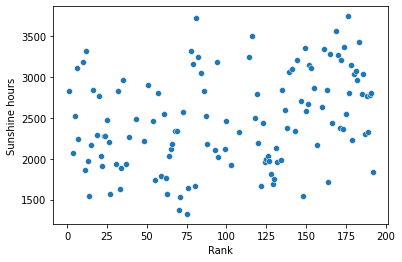

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot('Rank', 'Sunshine hours', data=data)